In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func1(a,h,b):
    d = a * h + b
    return d

def func2(a,h,b,c):
    d = a * h + b*h**2 + c
    return d

def func3(a, h,b):
    d = a * np.sqrt(h) + b
    return d

numParams_1=2
numParams_2 =3
h = np.array([100, 500, 900, 200, 600, 1000, 300, 700, 1200, 400, 800, 1400])
d = np.array([253, 469, 557, 337, 495, 573, 395, 520, 609, 438, 534, 643])
d_unc = [13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.]
h_unc = [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]
x0_1 = np.array(numParams_1*[1.0])
x0_2 = np.array(numParams_2*[1.0])
if len(h) != len(d):
    print('err')

sigma_h = 0
sigma_d = np.array(len(d)*[13])
print(sigma_d)
a_1, cov_a_1 = curve_fit(func1, h, d, x0_1, sigma_d, absolute_sigma=True)
a_2, cov_a_2 = curve_fit(func2, h, d, x0_2, sigma_d, absolute_sigma=True)
a_3, cov_a_3 = curve_fit(func3, h, d, x0_1, sigma_d, absolute_sigma=True)


ndof_1 = len(h) - numParams_1+1
chi2_1 = np.sum(((d - func1(a_1[0],h,a_1[1]))**2 )/sigma_d**2)
ndof_2 = len(h) - numParams_2+1
chi2_2 = np.sum(((d - func2(a_2[0],h, a_2[1], a_2[2]))/sigma_d)**2)
ndof_3 = len(h) - numParams_1+1
chi2_3 = np.sum(((d - func3(a_3[0],h, a_3[1]))/sigma_d)**2)

sigma_a_1 = np.sqrt(np.diag(cov_a_1)) #std dev
var_a_1 = np.diag(cov_a_1) #variance
sigma_a_2 = np.sqrt(np.diag(cov_a_2)) #std dev
var_a_2 = np.diag(cov_a_2) #variance
sigma_a_3 = np.sqrt(np.diag(cov_a_3)) #std dev
var_a_3 = np.diag(cov_a_3) #variance

print('part a:')
print("Fitted Params (LS Estimators) +- Std Dev ")
for i in range(len(a_1)):
    print("a",i,"",a_1[i], "+-", sigma_a_1[i])
    #print("Variance in LS Estimators:", varthetaEst)
print("")
print("Variance in LS Estimators up to order:",3)
for i in range(len(a_1)):
    print("a",i," variance",var_a_1[i])
print("")
print("Chi square number and degrees of freedom")
print("chi2 = ", chi2_1, ", ndof = ", ndof_1)
#print("Represents P value of 1.0")
print("---------")
print('part b:')
print("Fitted Params (LS Estimators) +- Std Dev ")
for i in range(len(a_2)):
    print("a",i,"",a_2[i], "+-", sigma_a_2[i])
    #print("Variance in LS Estimators:", varthetaEst)
print("")
print("Variance in LS Estimators up to order:",3)
for i in range(len(a_2)):
    print("a",i," variance",var_a_2[i])
print("")
print("Chi square number and degrees of freedom")
print("chi2 = ", chi2_2, ", ndof = ", ndof_2)
#print("Represents P value of 1.0")
print("-----")
print('part c:')
print("Fitted Params (LS Estimators) +- Std Dev ")
for i in range(len(a_3)):
    print("a",i,"",a_3[i], "+-", sigma_a_3[i])
    #print("Variance in LS Estimators:", varthetaEst)
print("")
print("Variance in LS Estimators up to order:",3)
for i in range(len(a_3)):
    print("a",i," variance",var_a_3[i])
print("")
print("Chi square number and degrees of freedom")
print("chi2 = ", chi2_3, ", ndof = ", ndof_2)
#print("Represents P value of 1.0")
print("-----")

al1 = a_1[0]
al2 = a_1[1]

num_pseudoexp = 100
num_vals = len(h)
pseudo_x = np . zeros ( num_vals * num_pseudoexp ). reshape (( num_vals , num_pseudoexp ))
chi2_vec = np . zeros ( num_pseudoexp )
for i in range ( len (h )):
    pseudo_x [i] = np . random . normal ( h[i] ,h_unc [i], num_pseudoexp )
# to avoid useless computation power we choose a range close enough to
# the one computed from the previous approach
al1_sc = np . linspace (0 , 1, 200)
al2_sc = np . linspace (300 , 400 , 200)
chi2vmin = 999.e10 # arbitrarily large value
a_new = []
# chi2 function with penalty
def chi2pen ( al1 , al2 , xval ):
    chi2 = sum ( np . power (d - al1 * xval + al2 / xval , 2) / np . power ( d_unc , 2) )
    chi2 += sum ( np . power (h - xval , 2) / np . power ( h_unc , 2) ) # penalty function
    return chi2
# find minimum chi2 using pseudoexperiments
chi2_matrix = np . zeros ( len ( al1_sc ) *len ( al2_sc ) ). reshape (( len ( al1_sc ) , len( al2_sc )) )
# define 'best alpha 's indices ' as the ones minimising the chi2
best_al1_idx = -1
best_al2_idx = -1
for i in range (len(al1_sc)):
    al1 = al1_sc[i]
    for j in range (len(al2_sc)) :
        al2 = al2_sc [j]
        # compute pseudoexperiments for this ( alpha1 , alpha2 ) combination
        for k in range ( num_pseudoexp ):
            xval = pseudo_x [: , k]
            chi2_vec [k] = chi2pen ( al1 , al2 , xval )
        chi2min = min ( chi2_vec )
        if chi2min < chi2vmin :
            chi2vmin = chi2min
            a_new = [ al1 , al2 ]
            best_al1_idx = i
            best_al2_idx = j
        chi2_matrix [i , j] = chi2min

        
# find uncertainties using graphical method
unc_al1_low , unc_al1_high , unc_al2_low , unc_al2_high = ([ -1. for _ in range (4) ])
for i in range ( len ( al1_sc )):
    if chi2_matrix [i , best_al2_idx ] <= chi2vmin +1.:
        if unc_al1_low < 0.:
            unc_al1_low = al1_sc [i ]
        unc_al1_high = al1_sc [i]
        
for j in range ( len ( al2_sc )):
    if chi2_matrix [ best_al1_idx , j] <= chi2vmin +1.:
        if unc_al2_low < 0.:
            unc_al2_low = al2_sc [j ]
        unc_al2_high = al2_sc [j]
# assume uncertainties are symmetric for simplicity
al1 , al2 = [ float (a ) for a in a_new ]
al1_unc = ( unc_al1_high - unc_al1_low ) /2.
al2_unc = ( unc_al2_high - unc_al2_low ) /2.
print ('pseudo - experiments\' results :')
print ('al1 = {} +{} -{} (+ -{}) '. format ( al1 , unc_al1_low , unc_al1_high , al1_unc ))
print ('al2 = {} +{} -{} (+ -{}) '. format ( al2 , unc_al2_low , unc_al2_high , al2_unc ))

[13 13 13 13 13 13 13 13 13 13 13 13]
part a:
Fitted Params (LS Estimators) +- Std Dev 
a 0  0.27145862586793734 +- 0.009737076489754953
a 1  302.01542761638 +- 7.568450338335332

Variance in LS Estimators up to order: 3
a 0  variance 9.481065856733862e-05
a 1  variance 57.28144052384819

Chi square number and degrees of freedom
chi2 =  70.61661286173101 , ndof =  11
---------
part b:
Fitted Params (LS Estimators) +- Std Dev 
a 0  0.2714586237694187 +- 0.010245094572805865
a 1  586.5489292571231 +- 598678142.7624638
a 2  258.7927526746255 +- 44116461.26584788

Variance in LS Estimators up to order: 3
a 0  variance 0.00010496196280573619
a 1  variance 3.5841551862151296e+17
a 2  variance 1946262154621056.0

Chi square number and degrees of freedom
chi2 =  1.71989268839444e+16 , ndof =  10
-----
part c:
Fitted Params (LS Estimators) +- Std Dev 
a 0  0.07368978481496058 +- 0.005286426729244799
a 1  302.0154282642992 +- 7.568450262745844

Variance in LS Estimators up to order: 3
a 0  varia

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


pseudo - experiments' results :
al1 = 0.6130653266331658 +0.6080402010050251 -0.6130653266331658 (+ -0.0025125628140703626) 
al2 = 300.0 +300.0 -318.5929648241206 (+ -9.2964824120603) 


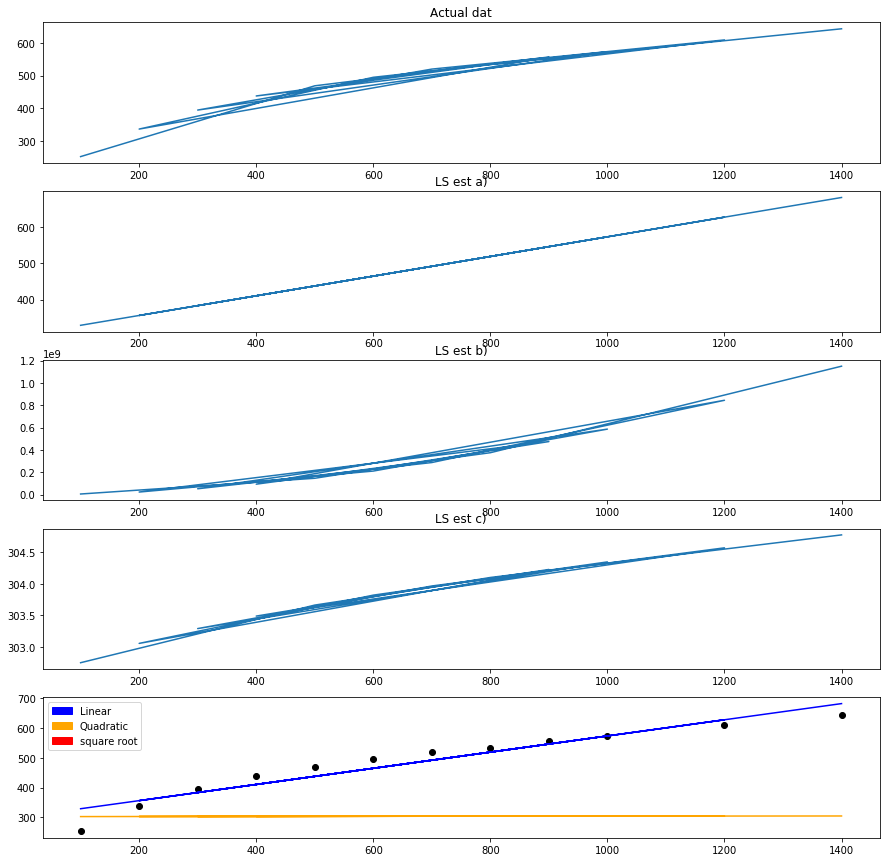

In [77]:
#plots
import matplotlib.patches as mpatches

fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(15,15))


ax2.plot(h, func1(0.27145862586793734, h, 302.01542761638))
ax2.set_title('LS est a)')

ax1.plot(h,d)
ax1.set_title('Actual dat')

ax3.plot(h, func2(0.2714586237694187, h,586.5489292571231, 258.7927526746255))
ax3.set_title('LS est b)')

ax4.plot(h, func3(0.07368978481496058, h,302.0154282642992))
ax4.set_title('LS est c)')

ax5.scatter(h,d, color='black')
blue_patch = mpatches.Patch(color='blue', label='Linear')
orange_patch = mpatches.Patch(color='orange', label='Quadratic')
red_patch = mpatches.Patch(color='red', label='square root')
#ax5.plot(h, func2(0.2714586237694187, h,586.5489292571231, 258.7927526746255), color='red')
ax5.plot(h, func1(0.27145862586793734, h, 302.01542761638), color='blue')
ax5.plot(h, func3(0.07368978481496058, h,302.0154282642992), color='orange')
ax5.legend(handles=[blue_patch, orange_patch, red_patch])


In [64]:
print(func1(*a_1,h))
print(a_1[0])

[ 181.98469297  581.98469297  981.98469297  281.98469297  681.98469297
 1081.98469297  381.98469297  781.98469297 1281.98469297  481.98469297
  881.98469297 1481.98469297]
0.27145862586793734


In [85]:
import matplotlib . pyplot as plt
import numpy as np
from scipy . stats import chi2

h = [100., 500., 900., 200., 600., 1000., 300., 700., 1200., 400., 800., 1400.] #height
d = [253., 469., 557., 337., 495., 573., 395., 520., 609., 438., 534., 643.] #distance
d_unc = [13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.]
h_unc = [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]

V = np.diag([unc**2 for unc in d_unc ])
inv_V = np.linalg.inv(V)

A = np.array([h]).T # Nx2 measurement array
darr = np.array ([d]) . T # Nx1 measurements array


# linear a extrapolation
a = float(np.linalg.inv(A.T.dot(inv_V ).dot(A))*A.T.dot(inv_V).dot(d))
print ('a factor',a)

# variance
var_a = float(np.linalg.inv(A.T.dot(inv_V).dot(A)))
a_unc = np.sqrt(var_a )
print ('variance on a:', var_a )
print ('uncertainty on a:', a_unc )



# # covariance
# cov_a = np.linalg.inv(A.T.dot(inv_V).dot(A)).T
# print ('variance on a:\n', cov_a )

# # chi2 /P- values
# chi2_val = float((darr -A.dot(a)).T.dot(inv_V).dot(darr -A.dot(a)))
# print ('chi2 value :', chi2_val )
# pval = 1- chi2.cdf(chi2_val,len(d)-2)
# print ('P- value :', pval )
# al1 = float (a[0])
# al2 = float (a[1])

a factor 0.6088827586206897
variance on a: 2.331034482758621e-05
uncertainty on a: 0.004828078792603349


In [111]:
import matplotlib . pyplot as plt
import numpy as np
from scipy . stats import chi2
# problem parameters
y = [ -4.02 , -2.74 , -1.15 , 1.49 , 6.87]
y_unc = [0.5 , 0.25 , 0.08 , 0.09 , 1.9]
x = [22.0e3 , 22.93e3 , 23.88e3 , 25.13e3 , 26.39e3 ]
x_unc = [440. , 470. , 500. , 530. , 540.]
C = 0.02e-6 # in F
omega0 = 1. # in rad /s
# diagonal uncertainties matrix and its inverse
V = np . diag ([ unc **2 for unc in y_unc ])
inv_V = np . linalg . inv (V )
A = np . array ([[ xval , -1./ xval ] for xval in x ]) # Nx2 measurement array
yarr = np . array ([ y ]) . T # Nx1 measurements array
# linear a extrapolation
a = np . linalg . inv (A.T . dot ( inv_V ). dot ( A)). dot ( A.T) . dot ( inv_V ). dot ( yarr )
print ('a vector :', a.T)
# covariance
cov_a = np . linalg . inv (A .T. dot ( inv_V ). dot (A) ).T
print ('variance on a:\n', cov_a )
# chi2 /P- values
chi2_val = float (( yarr -A. dot (a )).T . dot ( inv_V ). dot ( yarr -A. dot (a )))
print ('chi2 value :', chi2_val )
pval = 1- chi2 . cdf ( chi2_val , len (y ) -2)
print ('P- value :', pval )
al1 = float ( a [0])
al2 = float ( a [1])


# extrapolated value of L and R
R = 1./ omega0 /C/ al2
R_unc = 1./ al2 **2/ omega0 /C* np . sqrt ( float ( cov_a [1 ,1]) )
L = al1 / al2 *1./ C/ omega0 **2
L_unc = 1./( C* omega0 **2* al2 ) **2* cov_a [0 ,0]+( al1 /( C* omega0 **2* al2 **2) ) **2* cov_a [1 ,1]
L_unc -= (2.* al1 /( C **2* omega0 **4* al2 **3) )* cov_a [0 ,1]
L_unc = np . sqrt ( L_unc )
print ('resistor value R:', R , '+-', R_unc )
print ('self value L:', L , '+-', L_unc )
num_pseudoexp = 100
num_vals = len( x)
pseudo_x = np . zeros ( num_vals * num_pseudoexp ). reshape (( num_vals , num_pseudoexp ))
chi2_vec = np . zeros ( num_pseudoexp )
for i in range ( len (x )):
    pseudo_x [i] = np . random . normal ( x[i] , x_unc [i], num_pseudoexp )
# to avoid useless computation power we choose a range close enough to
# the one computed from the previous approach
al1_sc = np . linspace (9e-4 , 10e-4 , 200)
al2_sc = np . linspace (5e5 , 6e5 , 200)
chi2vmin = 999.e10 # arbitrarily large value
a_new = []
# chi2 function with penalty
def chi2pen ( al1 , al2 , xval ):
    chi2 = sum ( np . power (y - al1 * xval + al2 / xval , 2) / np . power ( y_unc , 2) )
    chi2 += sum ( np . power (x - xval , 2) / np . power ( x_unc , 2) ) # penalty function
    return chi2
# find minimum chi2 using pseudoexperiments
chi2_matrix = np . zeros ( len ( al1_sc ) *len ( al2_sc ) ). reshape (( len ( al1_sc ) , len( al2_sc )) )
# define 'best alpha 's indices ' as the ones minimising the chi2
best_al1_idx = -1
best_al2_idx = -1
for i in range (len(al1_sc)):
    al1 = al1_sc[i]
    for j in range (len(al2_sc)) :
        al2 = al2_sc [j]
        # compute pseudoexperiments for this ( alpha1 , alpha2 ) combination
        for k in range ( num_pseudoexp ):
            xval = pseudo_x [: , k]
            chi2_vec [k] = chi2pen ( al1 , al2 , xval )
        chi2min = min ( chi2_vec )
        if chi2min < chi2vmin :
            chi2vmin = chi2min
            a_new = [ al1 , al2 ]
            best_al1_idx = i
            best_al2_idx = j
        chi2_matrix [i , j] = chi2min
        

    

a vector : [[9.89996665e-04 5.89395642e+05]]
variance on a:
 [[1.50009097e-09 8.84812185e-01]
 [8.84812185e-01 5.23862987e+08]]
chi2 value : 10.063205637121255
P- value : 0.01803643486998696
resistor value R: 84.83265982054328 +- 3.2943142199094364
self value L: 0.08398405031368901 +- 0.00020210815284376385


KeyboardInterrupt: 

In [104]:
# find uncertainties using graphical method
unc_al1_low , unc_al1_high , unc_al2_low , unc_al2_high = ([ -1. for _ in range (4) ])
for i in range ( len ( al1_sc )):
    if chi2_matrix [i , best_al2_idx ] <= chi2vmin +1.:
        if unc_al1_low < 0.:
            unc_al1_low = al1_sc [i ]
        unc_al1_high = al1_sc [i]
        
for j in range ( len ( al2_sc )):
    if chi2_matrix [ best_al1_idx , j] <= chi2vmin +1.:
        if unc_al2_low < 0.:
            unc_al2_low = al2_sc [j ]
        unc_al2_high = al2_sc [j]
# assume uncertainties are symmetric for simplicity
al1 , al2 = [ float (a ) for a in a_new ]
al1_unc = ( unc_al1_high - unc_al1_low ) /2.
al2_unc = ( unc_al2_high - unc_al2_low ) /2.
print ('pseudo - experiments\' results :')
print ('al1 = {} +{} -{} (+ -{}) '. format ( al1 , unc_al1_low , unc_al1_high , al1_unc ))
print ('al2 = {} +{} -{} (+ -{}) '. format ( al2 , unc_al2_low , unc_al2_high , al2_unc ))
R = 1./ omega0 /C/ al2
R_unc = 1./ omega0 /C / al2 **2 * al2_unc
L = al1 / al2 *1./ C/ omega0 **2
L_unc = np . sqrt (( al1 * R_unc / omega0 ) **2+( R* al1_unc /2./ omega0 ) **2)
print ('minimal chi2 value :', chi2vmin )
print ('resistor value R:', R , '+-', R_unc )
print ('self value L:', L , '+-', L_unc )

pseudo - experiments' results :
al1 = 0.0009693467336683417 +0.0009673366834170855 -0.000971356783919598 (+ -2.0100502512562703e-06) 
al2 = 578894.4723618091 +577889.4472361809 -579899.4974874372 (+ -1005.0251256281626) 
minimal chi2 value : 3.870895956802343
resistor value R: 86.37152777777777 +- 0.1499505690586452
self value L: 0.08372395833333332 +- 0.00016930155703190436


In [113]:
print(1/140)


0.007142857142857143


In [138]:
def func(f,a,b,f_1,a_1,b_1):
    t = (2.303*np.log10(f))/((0.693/a)-(0.693/b))
    err = np.sqrt((1./(f**2*(a-b)**4))*(f**2 * (11.0439*a**4 * b_1**2 + 11.0439*a_1**2 * b**4) * (np.log10(f))**2 + a**2 * b**2 * f_1**2 *( 11.0439*a**2 - 22.0877*a*b+ 11.0439* b**2) ) ) 
    return t, err, (err/t *100)

f = 0.00726
f_1 = 0.00005 
a = 4.47e9
a_1 = 0.02e9
b = 0.703e9
b_1 = 0.003e9

func(f,a,b,f_1,a_1,b_1)

#error = np.sqrt((1/(f**2(a-b)**4))(f**2 * (11.0439*a**4 * b_1**2 + 11.0439*a_1**2 * b**4) * np.log**2(f) + a**2 * b**2 * f_1**2 *( 11.0439*a**2 - 22.0877*a*b+ 11.0439* b**2) ) ) 

(5929957543.532951, 35926803.833921276, 0.6058526316617909)

In [140]:
print(A. dot (a ))

[[ 9.83400000e+13 -2.03181818e+05]
 [ 1.02497100e+14 -1.94941125e+05]
 [ 1.06743600e+14 -1.87185930e+05]
 [ 1.12331100e+14 -1.77875050e+05]
 [ 1.17963300e+14 -1.69382342e+05]]
